In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [15]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [16]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [18]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [19]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 79s 104ms/step - loss: 1.2032 - accuracy: 0.5958 - val_loss: 0.5919 - val_accuracy: 0.6802
Epoch 2/5
625/625 [==============================] - 69s 109ms/step - loss: 0.5989 - accuracy: 0.6901 - val_loss: 0.6099 - val_accuracy: 0.6576
Epoch 3/5
625/625 [==============================] - 67s 107ms/step - loss: 0.4951 - accuracy: 0.7641 - val_loss: 0.9426 - val_accuracy: 0.6812
Epoch 4/5
625/625 [==============================] - 67s 106ms/step - loss: 0.4195 - accuracy: 0.8086 - val_loss: 0.4937 - val_accuracy: 0.7946
Epoch 5/5
625/625 [==============================] - 67s 107ms/step - loss: 0.3653 - accuracy: 0.8373 - val_loss: 1.0385 - val_accuracy: 0.6962


In [24]:
import cv2

In [26]:
test_img = cv2.imread('/content/Abyssinian-sorrel.webp')

In [27]:
import matplotlib.pyplot as plt


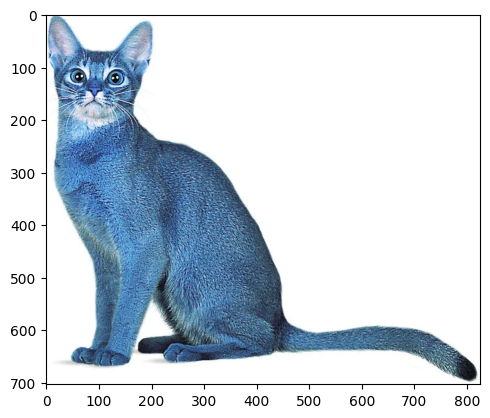

In [28]:
plt.imshow(test_img)

In [29]:
test_img.shape

(703, 825, 3)

In [30]:
test_img = cv2.resize(test_img,(256,256))

In [32]:
test_input = test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 365ms/step


array([[0.]], dtype=float32)